In [33]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
df = pd.read_csv('colombo_rh_2012-2018.csv', parse_dates = True)

In [5]:
df.head(10)

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
5,43466,COLOMBO,RHMAX,2012,1,6,93.0
6,43466,COLOMBO,RHMAX,2012,1,7,96.0
7,43466,COLOMBO,RHMAX,2012,1,8,96.0
8,43466,COLOMBO,RHMAX,2012,1,9,98.0
9,43466,COLOMBO,RHMAX,2012,1,10,93.0


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [8]:
df.head(10)

,year,month,day,obs_val
0,2012,1,1,91.0
1,2012,1,2,90.0
2,2012,1,3,89.0
3,2012,1,4,89.0
4,2012,1,5,95.0
5,2012,1,6,93.0
6,2012,1,7,96.0
7,2012,1,8,96.0
8,2012,1,9,98.0
9,2012,1,10,93.0


In [9]:
df = df.assign(Date = df.year.astype(str) + '-' + df.month.astype(str) + '-' + df.day.astype(str))

In [10]:
df

,year,month,day,obs_val,Date
0,2012,1,1,91.0,2012-1-1
1,2012,1,2,90.0,2012-1-2
2,2012,1,3,89.0,2012-1-3
3,2012,1,4,89.0,2012-1-4
4,2012,1,5,95.0,2012-1-5
...,...,...,...,...,...
4398,2018,12,27,90.0,2018-12-27
4399,2018,12,28,88.0,2018-12-28
4400,2018,12,29,76.0,2018-12-29
4401,2018,12,30,81.0,2018-12-30


In [11]:
df.drop(["year", "month", "day"], axis = 1, inplace = True)

In [12]:
df

,obs_val,Date
0,91.0,2012-1-1
1,90.0,2012-1-2
2,89.0,2012-1-3
3,89.0,2012-1-4
4,95.0,2012-1-5
...,...,...
4398,90.0,2018-12-27
4399,88.0,2018-12-28
4400,76.0,2018-12-29
4401,81.0,2018-12-30


In [14]:
columns_titles = ["Date","obs_val"]
df=df.reindex(columns=columns_titles)
df

,Date,obs_val
0,2012-1-1,91.0
1,2012-1-2,90.0
2,2012-1-3,89.0
3,2012-1-4,89.0
4,2012-1-5,95.0
...,...,...
4398,2018-12-27,90.0
4399,2018-12-28,88.0
4400,2018-12-29,76.0
4401,2018-12-30,81.0


In [15]:
df = df.set_index('Date')
df

,obs_val
Date,
2012-1-1,91.0
2012-1-2,90.0
2012-1-3,89.0
2012-1-4,89.0
2012-1-5,95.0
...,...
2018-12-27,90.0
2018-12-28,88.0
2018-12-29,76.0


In [17]:
df.describe()

,obs_val
count,4383.000000
mean,82.619895
std,8.533591
min,46.000000
25%,77.000000
50%,84.000000
75%,89.000000
max,98.000000


<AxesSubplot: xlabel='Date'>

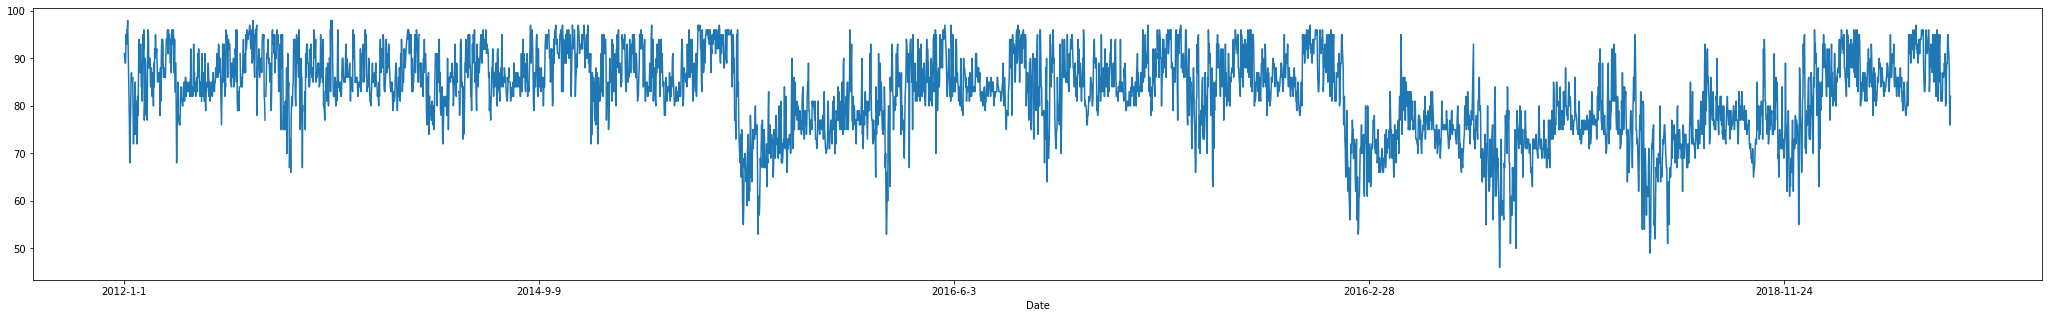

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 36, 5
df['obs_val'].plot()

In [19]:
#data cleaning 
#identify missing values
df.isnull().sum()

obs_val    20
dtype: int64

In [20]:
#using pad to make available "last known value" at every missing points

df.obs_val.fillna(method='pad', inplace=True)
df.obs_val.fillna(method='pad', inplace=True)

In [21]:
#check again to find the missing values
df.isnull().sum()


obs_val    0
dtype: int64

In [22]:
df.describe()

,obs_val
count,4403.000000
mean,82.635249
std,8.523909
min,46.000000
25%,77.000000
50%,84.000000
75%,89.000000
max,98.000000


<AxesSubplot: xlabel='Date'>

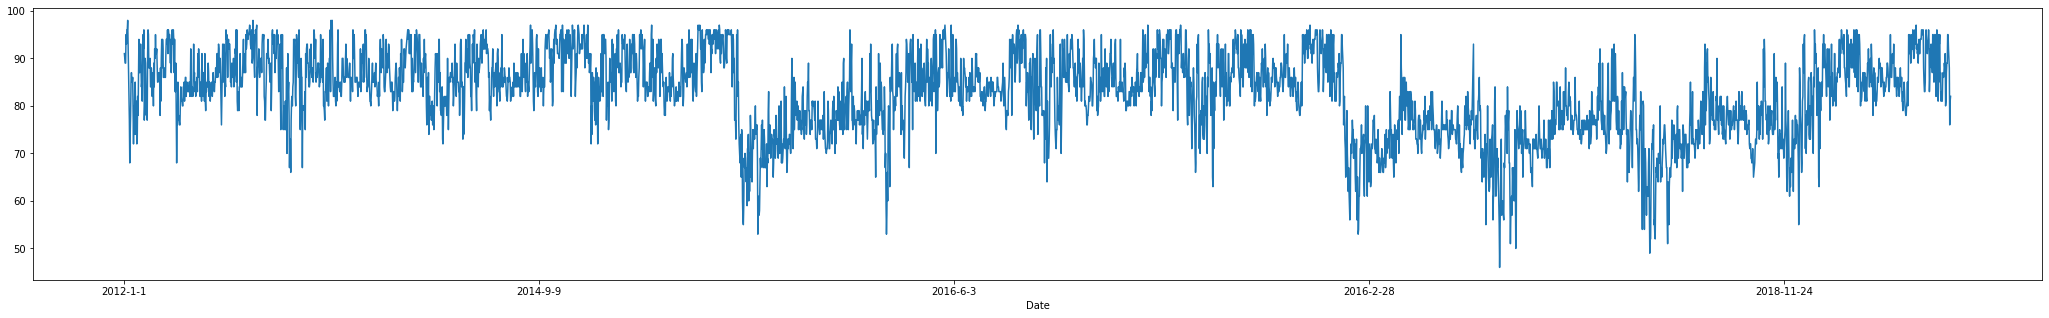

In [23]:
df['obs_val'].plot()

In [31]:
from statsmodels.tsa.stattools import adfuller 

def adf_test(ds):
    df_test = adfuller(ds, autolag='AIC')
    labels = [
        'ADF Statistic', 'p-value',
        'No of lags used',
        'No of observations used for ADF regression and critical values calculation',
        'Critical Values'
    ]

    for v, label in zip(df_test, labels):
        print(label + ' : ' + str(v))

    if df_test[1] <= 0.05:
        print("It's Stationary.")
    else:
        print("It's Non-Stationary.")

adf_test(df['obs_val'])


ADF Statistic : -4.05827769459485
p-value : 0.0011342876872598702
No of lags used : 27
No of observations used for ADF regression and critical values calculation : 4375
Critical Values : {'1%': -3.4318455750742785, '5%': -2.8622008616830437, '10%': -2.5671217810416325}
It's Stationary.


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
#find the best order for ARIMA model

from pmdarima import auto_arima
step_fit = auto_arima(df['obs_val'], trace=True, suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25887.684, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26802.288, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26434.784, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26224.064, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26800.289, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25887.310, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26029.620, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25897.538, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25888.852, Time=1.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=25925.303, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25885.576, Time=2.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25887.517, Time=4.20 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=25887.429, Time=4.19 sec
 ARIMA(1,1,4)(0,0,0)[0] i

In [39]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4403
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -12935.788
Date:                Sun, 09 Apr 2023   AIC                          25883.577
Time:                        17:47:09   BIC                          25921.915
Sample:                             0   HQIC                         25897.101
                               - 4403                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3495      0.057     -6.129      0.000      -0.461      -0.238
ar.L2          0.5413      0.047     11.602      0.000       0.450       0.633
ma.L1         -0.0904      0.059     -1.544      0.123      -0.205       0.024
ma.L2         -0.8448      0.065    -13.033      0.000      -0.972      -0.718
ma.L3          0.0712      0.029      2.474      0.013       0.015       0.128
sigma2        20.8888      0.338     61.731      0.000      20.226      21.552
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               456.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
import statsmodels.api as sm

#Split the Dataset

print('Original dataset :', df.shape)

train_ds = df.iloc[:-1321] #1321
test_ds = df.iloc[-1321:]

print('Training dataset :', train_ds.shape, ', Testing dataset :', test_ds.shape)

Original dataset : (4403, 1)
Training dataset : (3082, 1) , Testing dataset : (1321, 1)


In [88]:
#train the training dataset

train_model = sm.tsa.arima.ARIMA(train_ds['obs_val'],order=(2,1,3))
tr_model = train_model.fit()

In [89]:
tr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                obs_val   No. Observations:                 3082
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -9031.904
Date:                Sun, 09 Apr 2023   AIC                          18075.808
Time:                        18:55:19   BIC                          18112.006
Sample:                             0   HQIC                         18088.810
                               - 3082                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3296      0.058     -5.639      0.000      -0.444      -0.215
ar.L2          0.5759      0.053     10.887      0.000       0.472       0.680
ma.L1         -0.1276      0.061     -2.106      0.035      -0.246      -0.009
ma.L2         -0.8558      0.068    -12.655      0.000      -0.988      -0.723
ma.L3          0.1135      0.037      3.082      0.002       0.041       0.186
sigma2        20.5905      0.404     50.991      0.000      19.799      21.382
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               312.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.17
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
#doing a prediction by test on testing dataset

start = len(train_ds)
end  = len(df)-1

prediction = tr_model.predict(start = start, end = end, type = 'levels').rename('ARIMA Predictions')

print(prediction)

3082    79.985211
3083    79.614963
3084    78.745513
3085    78.818892
3086    78.294009
          ...    
4398    78.178596
4399    78.178596
4400    78.178596
4401    78.178596
4402    78.178596
Name: ARIMA Predictions, Length: 1321, dtype: float64


<AxesSubplot: xlabel='Date'>

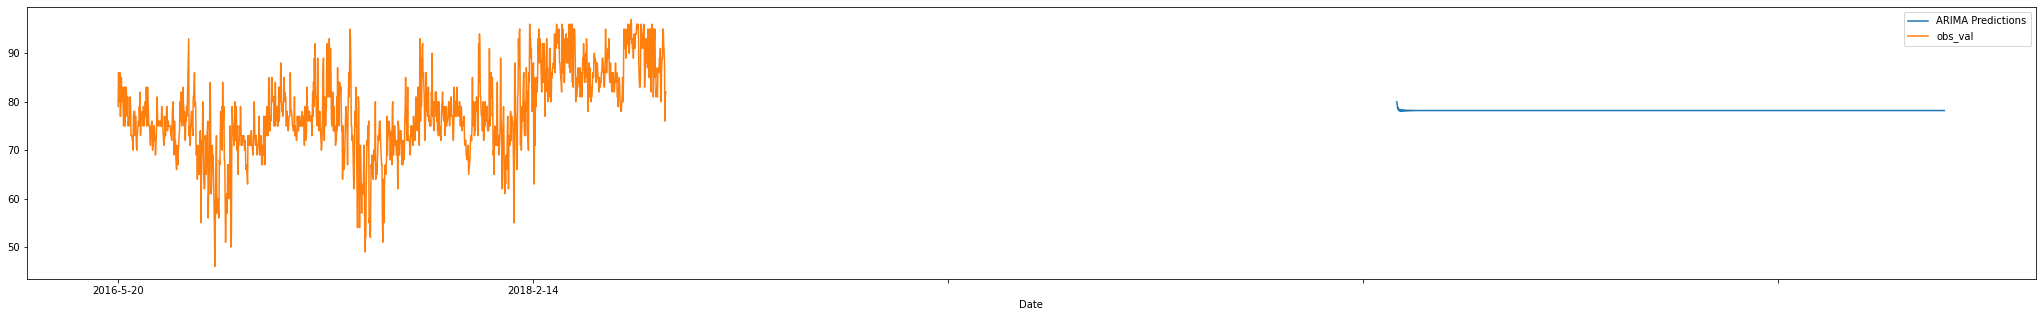

In [91]:
prediction.plot(legend = True)
test_ds['obs_val'].plot(legend = True)

In [92]:
test_ds['obs_val'].mean()
print('mean of the testing set - ' , test_ds['obs_val'].mean())

mean of the testing set -  77.78955336866011


In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(prediction, test_ds['obs_val'])
rmse = sqrt(mean_squared_error(prediction, test_ds['obs_val']))

print('Mean Squared Error: ' ,mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error:  74.88293390984519
Root Mean Squared Error: 8.653492584491259


In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = (mean_absolute_error(prediction, test_ds['obs_val']))
mape = (mean_absolute_percentage_error(prediction, test_ds['obs_val']))

print('Mean Absolute Error: ' ,mae)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Error:  6.805682690080692
Mean Absolute Percentage Error: 0.08705098606960514


In [98]:
#making prediction for entire dataSet

model = sm.tsa.arima.ARIMA(df['obs_val'], order=(2,1,3))
model = model.fit()


In [99]:
df.tail()

,obs_val
Date,
2018-12-27,90.0
2018-12-28,88.0
2018-12-29,76.0
2018-12-30,81.0
2018-12-31,82.0


In [125]:
#Making Prediction for future 12 months

# index_future_predict = pd.date_range(start = '2014-7-1', end = '2018-12-1')
# prediction = model.predict(start=len(df), end=len(df)+11,typ = 'levels',dynamic = True).rename('ARIMA Future Prediction')
# prediction.index = index_future_predict
# print(prediction)

index_future_predict = pd.date_range(start='2014-7-1', periods=1615, freq='D')
prediction = model.predict(start=len(df), end=len(df)+1614, typ='levels', dynamic=True).rename('ARIMA Future Prediction')
prediction.index = index_future_predict
print(prediction)


2014-07-01    84.063664
2014-07-02    84.777337
2014-07-03    85.566194
2014-07-04    85.676828
2014-07-05    86.065167
                ...    
2018-11-27    86.231446
2018-11-28    86.231446
2018-11-29    86.231446
2018-11-30    86.231446
2018-12-01    86.231446
Freq: D, Name: ARIMA Future Prediction, Length: 1615, dtype: float64


<AxesSubplot: >

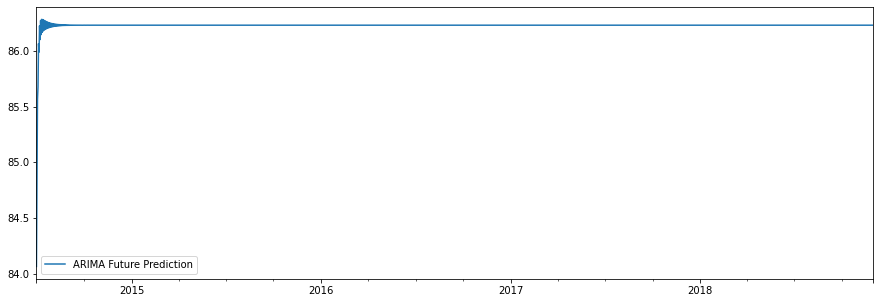

In [126]:
prediction.plot(figsize=(15,5),legend=True)

In [124]:
df['obs_val']

Date
2012-1-1      91.0
2012-1-2      90.0
2012-1-3      89.0
2012-1-4      89.0
2012-1-5      95.0
              ... 
2018-12-27    90.0
2018-12-28    88.0
2018-12-29    76.0
2018-12-30    81.0
2018-12-31    82.0
Name: obs_val, Length: 4403, dtype: object

ConversionError: Failed to convert value(s) to axis units: array([Period('2014-07-01', 'D'), Period('2014-07-02', 'D'),
       Period('2014-07-03', 'D'), ..., Period('2018-11-29', 'D'),
       Period('2018-11-30', 'D'), Period('2018-12-01', 'D')], dtype=object)

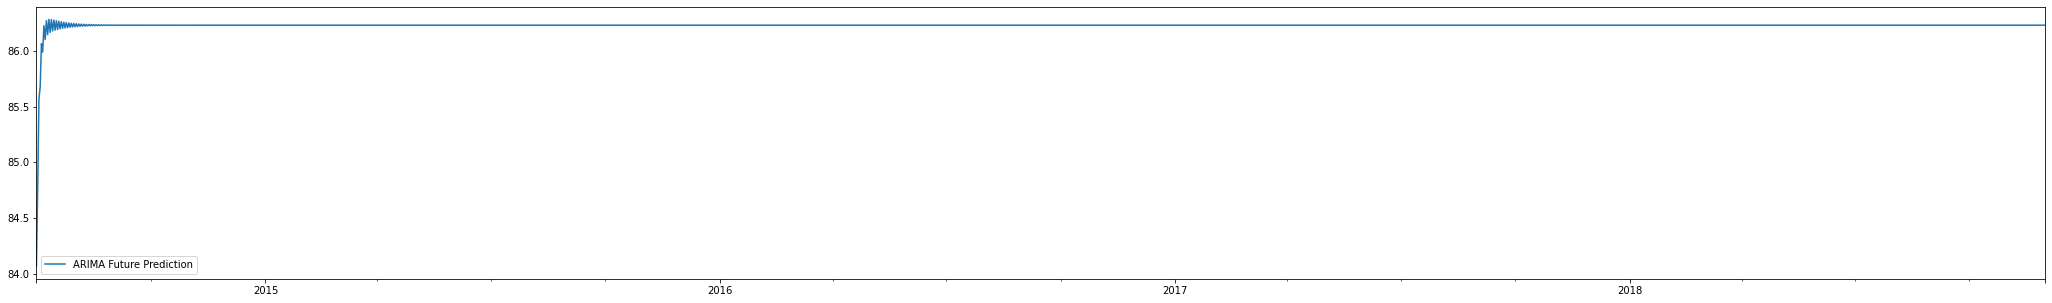

In [128]:
future_df = pd.concat([df,prediction])

prediction.plot(legend=True)
df['obs_val'].plot(legend=True)